What are features?

What is information?

??????

How many features?

Which Features?

Can we make new features?

Pitfalls

How to select best features?



In [ ]:
curse of dimensionality?

In [9]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split

data = pd.read_csv('../datasets/ames_housing_trimmed_processed.csv')

data.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


[ -1.53047500e+02  -8.90035845e+01   3.76473376e-01   1.60822454e+04
   5.07524766e+03   2.88810787e+02   3.12700992e+03   4.55987344e+01
   1.36947999e+04   4.32372473e+03   8.85775388e+03   8.98641179e+03
  -4.58585620e+03   6.78394208e+03   2.58875110e+01   1.18041318e+04
   9.63051911e+03   1.36942085e+04   1.46911743e+04  -1.81728436e+04
  -2.06061948e+03  -2.54134992e+04  -1.95164515e+04  -2.24655880e+04
  -2.79604341e+03  -3.84586503e+04  -2.77450936e+04  -3.39892379e+04
  -2.12340461e+03  -3.16489976e+04  -3.23802880e+04   1.30693945e+03
  -4.23936620e+04   2.02281029e+04   4.39719769e+04  -4.09468913e+04
  -5.03773310e+04  -3.42999016e+04  -2.29799850e+04   2.50177717e+03
   3.54644022e+04  -1.71915098e+04   4.66182632e+03   1.49888181e+04
  -6.32695046e+03  -4.26124260e+04  -2.69074132e+04   7.97823320e+02
   9.41538417e+03   2.42355557e+04  -1.08871910e+04  -5.14097212e+03
   1.21717175e+04   8.68543285e+03  -5.55664861e+03  -2.58102488e+03]
[-0.0050332163842483624,
 0.05042

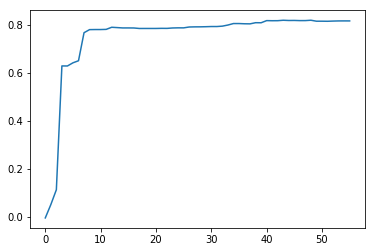

In [10]:
from sklearn.linear_model import LinearRegression

scores = []
for feature in np.arange(1,data.shape[1]):
    X_data = data.drop("SalePrice",axis = 1)
    label = data["SalePrice"]
    
    X_data = data.values[:,:feature]
    
    X_train, X_test, y_train, y_test = train_test_split(X_data,label, test_size=0.3, random_state=24)
    
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    scores.append(lr.score(X_test,y_test))
    if (feature == 56):
        print(lr.coef_)
    
import matplotlib.pyplot as plt 
%matplotlib inline

from pprint import pprint
pprint(scores)
plt.plot(scores)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
scores = []
# for feature in np.arange(1,data.shape[1]):
X_data = data.drop("SalePrice",axis = 1)
label = data["SalePrice"]

X_data = X_data.values

X_train, X_test, y_train, y_test = train_test_split(X_data,label, test_size=0.3, random_state=24)

lr = DecisionTreeRegressor()
lr.fit(X_train,y_train)


print(lr.feature_importances_)

# import matplotlib.pyplot as plt 
# %matplotlib inline

# from pprint import pprint
# pprint(scores)
# plt.plot(scores)
# plt.show()

[  5.01988541e-03   8.48118132e-03   3.94568302e-02   6.58546569e-01
   9.80583463e-03   3.83929551e-02   2.21521918e-03   1.58415910e-01
   5.83111680e-03   6.75242330e-04   1.22277604e-03   8.95105349e-04
   5.29080620e-03   1.69075549e-03   4.39029845e-02   2.46512082e-04
   0.00000000e+00   1.46048576e-04   3.23631953e-03   0.00000000e+00
   7.81212169e-06   2.09480997e-04   5.73982909e-04   1.66612791e-03
   3.16039538e-03   6.70987350e-04   2.04547911e-05   5.68547088e-06
   3.30811285e-04   1.02871413e-04   2.05204275e-04   3.69441977e-05
   6.45278336e-04   5.51472467e-04   2.35944123e-04   6.85953340e-05
   2.44592705e-04   2.94051628e-04   6.78823208e-05   5.24470239e-05
   1.94762037e-07   7.88234850e-05   2.89135140e-04   8.76820852e-05
   6.12125020e-05   0.00000000e+00   2.16249874e-04   0.00000000e+00
   4.71865958e-03   0.00000000e+00   8.86383668e-06   1.16628444e-03
   0.00000000e+00   7.21027814e-05   2.32560711e-05   6.54461656e-04]


In [ ]:
SelectKBest - gives us k best features 
SelectKPercentile  -  how much k% features we want 